# IDENTIFICATION OF MODELS

In [182]:
from warnings import filterwarnings
filterwarnings('ignore')

In [183]:
import pandas as pd 
df = pd.read_csv('train_titanic.csv')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
s = df.isna().sum()
s


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [186]:
s = s[s>0]
s

Age         177
Cabin       687
Embarked      2
dtype: int64

# Seprate X and Y 

In [187]:
X = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])

In [188]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [189]:
Y = df[['Survived']]

In [190]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Seprate CAT and CON for X

In [191]:
cat = list(X.columns[X.dtypes=='object'])
cat

['Sex', 'Embarked']

In [192]:
con = list(X.columns[X.dtypes!='object'])
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Creat a PREPROCESSING PIPELINE 

In [193]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [194]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [195]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [196]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [197]:
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [198]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [199]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [200]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


# Apply TRAIN TEST SPLIT

In [201]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y)

In [202]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
687,0.827377,-0.796286,-0.474545,-0.473674,-0.443636,0.0,1.0,0.0,0.0,1.0
882,0.827377,-0.565736,-0.474545,-0.473674,-0.436671,1.0,0.0,0.0,0.0,1.0
525,0.827377,0.855986,-0.474545,-0.473674,-0.492378,0.0,1.0,0.0,1.0,0.0
193,-0.369365,-2.025883,0.432793,0.767630,-0.124920,0.0,1.0,0.0,0.0,1.0
700,-1.566107,-0.873136,0.432793,-0.473674,3.932723,1.0,0.0,1.0,0.0,0.0


In [203]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
490,0.827377,-0.104637,0.432793,-0.473674,-0.246398,0.0,1.0,0.0,0.0,1.0
728,-0.369365,-0.335187,0.432793,-0.473674,-0.124920,0.0,1.0,0.0,0.0,1.0
206,0.827377,0.202762,0.432793,-0.473674,-0.329287,0.0,1.0,0.0,0.0,1.0
516,-0.369365,0.356462,-0.474545,-0.473674,-0.437007,1.0,0.0,0.0,0.0,1.0
425,0.827377,-0.104637,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0


In [204]:
xtrain.shape

(668, 10)

In [205]:
xtest.shape

(223, 10)

# ALGORITHM EVALUATION

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [207]:
dct = {
    
       'logistic': LogisticRegression(),
       'Decision tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'Knn': KNeighborsClassifier(),
       'Svm': SVC()
       
       }

In [208]:
dct.items()

dict_items([('logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('Knn', KNeighborsClassifier()), ('Svm', SVC())])

# Fit the Model and Evaluate the Results F1_SCORE

In [209]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [210]:
tr = []
ts = []
tr_cv = []


for name , model in dct.items() :
    
    # Fit the model 
    model.fit(xtrain,ytrain)



    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)



    # Calculate F1 Score
    F1_tr = f1_score(ytrain,ypred_tr)
    F1_ts = f1_score(ytest,ypred_ts)



    # 5 Fold Cross Validation
    scores = cross_val_score(model,xtrain,ytrain,cv=5, scoring='f1_macro')

    F1_cv = scores.mean()



    # Append above results in tr , ts , tr_cv
    tr.append(F1_tr)
    ts.append(F1_ts)
    tr_cv.append(F1_cv)


    # Print above results 

    print(f' Model Name                : {name}')
    print(f' Train F1                  : {F1_tr:.4f}')
    print(f' Train f1 Cross Validation : {F1_cv:.4f}')
    print(f' Test F1                    : {F1_ts:.4f}')
    print('\n====================================\n')


 Model Name                : logistic
 Train F1                  : 0.7403
 Train f1 Cross Validation : 0.7827
 Test F1                    : 0.7101


 Model Name                : Decision tree
 Train F1                  : 0.9762
 Train f1 Cross Validation : 0.7490
 Test F1                    : 0.7243




 Model Name                : Random Forest
 Train F1                  : 0.9763
 Train f1 Cross Validation : 0.7833
 Test F1                    : 0.7529


 Model Name                : Gradient Boost
 Train F1                  : 0.8619
 Train f1 Cross Validation : 0.8050
 Test F1                    : 0.7799


 Model Name                : Knn
 Train F1                  : 0.7856
 Train f1 Cross Validation : 0.7849
 Test F1                    : 0.7089


 Model Name                : Svm
 Train F1                  : 0.7745
 Train f1 Cross Validation : 0.8128
 Test F1                    : 0.7500




# Save above results in DATFRAME

In [211]:
dct

{'logistic': LogisticRegression(),
 'Decision tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'Knn': KNeighborsClassifier(),
 'Svm': SVC()}

In [212]:
namess = list(dct.keys())
namess

['logistic', 'Decision tree', 'Random Forest', 'Gradient Boost', 'Knn', 'Svm']

In [213]:
results_dct = {'Model Name ':namess,
               'Train F1':tr,
                'Test F1':ts,
                 'Train F1_CV':F1_cv}

In [214]:
results_df = pd.DataFrame(results_dct)
results_df

,Model Name,Train F1,Test F1,Train F1_CV
0,logistic,0.740286,0.710059,0.812844
1,Decision tree,0.976190,0.724324,0.812844
2,Random Forest,0.976285,0.752941,0.812844
3,Gradient Boost,0.861925,0.779874,0.812844
4,Knn,0.785563,0.708861,0.812844
5,Svm,0.774468,0.750000,0.812844


In [215]:
results_df = results_df.sort_values(by='Test F1',ascending=False)
results_df

,Model Name,Train F1,Test F1,Train F1_CV
3,Gradient Boost,0.861925,0.779874,0.812844
2,Random Forest,0.976285,0.752941,0.812844
5,Svm,0.774468,0.750000,0.812844
1,Decision tree,0.976190,0.724324,0.812844
0,logistic,0.740286,0.710059,0.812844
4,Knn,0.785563,0.708861,0.812844


In [216]:
# So for us gradient boosting has the high score

# Creat a GRADIENT BOOSTING MODEL

In [217]:
best_model = GradientBoostingClassifier()
best_model.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [218]:
model.score(xtrain,ytrain)


0.8413173652694611

In [219]:
model.score(xtest,ytest)

0.820627802690583

# Predict the results for train and test

In [220]:
ypred_tr = best_model.predict(xtrain)
ypred_tr[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [221]:
ypred_ts = best_model.predict(xtest)
ypred_ts[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [222]:
ytrain.head()

,Survived
687,0
882,0
525,0
193,1
700,1


# Create  a CONFUSION MATRIX

In [223]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

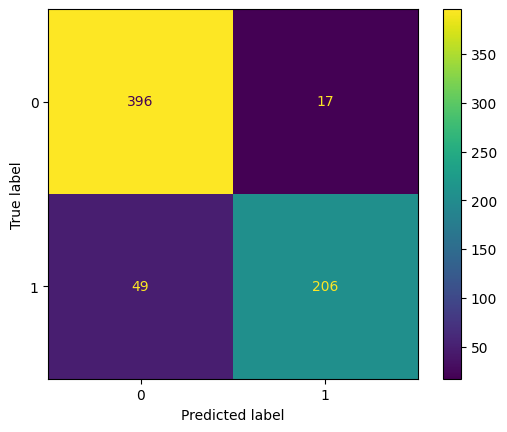

In [224]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cf = confusion_matrix(ytrain,ypred_tr)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

# Classification Report

In [225]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,ypred_tr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.92      0.81      0.86       255

    accuracy                           0.90       668
   macro avg       0.91      0.88      0.89       668
weighted avg       0.90      0.90      0.90       668

